In [23]:
import os

import logging
import random
import numpy as np
import itertools

## later fix to parantheses
from constants import (PATH_DATA, PATH_EDA_FIGS, 
PATH_RESULTS_FIGS, PATH_MODELS, LABEL_NAME, PARAM_GRID_RF,
COLS_TOKEEP)
from churn_library import (import_data,
                          visualize_cat, 
                          visualize_numeric,
                          visualize_numeric_bivar,
                          perform_eda,
                            encoder_helper,
                          perform_feature_engineering,
                          train_models)


In [2]:
def test_import(import_data):
    '''
    test data import 
    '''
    try:
        df = import_data(PATH_DATA)
        logging.info("Testing import_data: SUCCESS")
    except FileNotFoundError as err:
        logging.error("Testing import_eda: The file wasn't found")
        raise err

    try:
        assert df.shape[0] > 0
        assert df.shape[1] > 0
    except AssertionError as err:
        logging.error("Testing import_data: The file doesn't appear to have rows and columns")
        raise err


In [3]:
def test_visualize_cat(visualize_cat, df_touse):
    '''
    test visualize_cat function
    '''
    ## execute function with test data
    one_col = "cat_col"
    visualize_cat(df_touse, one_col)
    
    ## check results
    try:
        assert os.path.isfile(PATH_EDA_FIGS + one_col + ".png")
        logging.info("SUCCESS passed test for visualize_cat")
    except AssertionError as err:
        logging.error("ERROR visualize_cat didnt produce a valid image file")
        raise err
    
        
    

In [4]:
def test_visualize_numeric(visualize_numeric, df_touse):
    '''
    test visualize_numeric function
    '''
    ## execute function with test data
    one_col = "numeric_col"
    visualize_numeric(df_touse, one_col)
    
    ## check results
    try:
        assert os.path.isfile(PATH_EDA_FIGS + one_col + ".png")
        logging.info("SUCCESS passed test for visualize_numeric")
    except AssertionError as err:
        logging.error("ERROR visualize_numeric didnt produce a valid image file")
        raise err

In [5]:
def test_visualize_numeric_bivar(visualize_numeric_bivar, df_touse):
    '''
    test visualize_numeric function
    '''
    ## execute function with test data
    one_col = "numeric_col"
    visualize_numeric_bivar(df_touse, one_col)
    
    ## check results
    try:
        assert os.path.isfile(PATH_EDA_FIGS + one_col + "_bivar_wchurn.png")
        logging.info("SUCCESS passed test for visualize_numeric_bivar")
    except AssertionError as err:
        logging.error("ERROR visualize_numeric_bivar didnt produce a valid image file")
        raise err

In [6]:
def test_eda(perform_eda):
    '''
    test perform eda function- note that the actual file creation has been tested above
    '''
    try:
        assert os.path.isdir(PATH_EDA_FIGS)
        logging.info("SUCCESS directory for images exists")
    except AssertionError as err:
        logging.error("ERROR inputted image directory does not exist")
        raise err


In [66]:

def test_encoder_helper(encoder_helper, df_touse):
    '''
    test encoder helper
    '''
    ## execute function on test data
    category_lst = ["cat_col"]
    result_encoded = encoder_helper(df_touse, category_lst)
    
    ## check nonzero shape
    try:
        assert result_encoded.shape[0] > 0
        assert result_encoded.shape[1] > 0
        logging.info("SUCCESS encoder_helper produced result with non-zero shape")
    except AssertionError as err:
        logging.error("ERROR encoder_helper produced dataframe with 0 rows or columns")
        raise err
        
    ## make sure the encoded cols are added
    try:
        category_lst_suffix = [x + "_Churn" for x in category_lst]
        intersect_wdf = set(category_lst_suffix).intersection(set(result_encoded.columns))
        assert len(intersect_wdf) > 0
        logging.info("SUCCESS encoder_helper added encoded v of cols in category_lst")
    except AssertionError as err:
        logging.error("ERROR encoder_helper didnt add encoded columns")
        
    return result_encoded


def test_perform_feature_engineering(perform_feature_engineering, df_touse):
    '''
    test perform_feature_engineering
    '''
    
    ## execute function on test data
    X_train, X_test, y_train, y_test = perform_feature_engineering(
                                    df_touse, keep_cols = ['cat_col',
                                                          'numeric_col'])
    
    ## check results
    ## based on 10-row df and 0.7 train 0.3 test set split
    try:
        assert X_train.shape[0] == 7
        logging.info("SUCCESS training data correct dimensions")
    except AssertionError as err:
        logging.error("ERROR training data has incorrect dimensions")
        raise err
    try:
        assert X_test.shape[0] == 3
        logging.info("SUCCESS test data correct dimensions")
    except AssertionError as err:
        logging.error("ERROR test data has incorrect dimensions")
        raise err
    try:
        assert isinstance(y_train, pd.Series)
        assert isinstance(y_test, pd.Series)
        logging.info("SUCCESS train and test label are correct type")
    except AssertionError as err:
        logging.error("ERROR train or test label are incorrect type")
        raise err
    
    return(X_train, X_test, y_train, y_test)
    
    

def test_train_models(train_models):
    '''
    test train_models
    '''
    
    ## generate pathnames for models
    model_pths = [PATH_MODELS + model + "_model.pkl" 
                  for model in ["logistic", "rfc"]]
    
    ## generate pathnames for model images
    mod_names = ["Random Forest", "Logistic Regression"]
    image_names = ["classificationreport",
                     "fiorcoef",
                     "roc_curve"]
    all_paths = []
    for mod in mod_names:
        for image in image_names:
            all_paths.append(PATH_RESULTS_FIGS + mod + "_" + image + ".png")
    
    ## check that all exist
    ## code derived from this post: https://stackoverflow.com/questions/59112474/check-if-list-of-file-paths-exist
    try:
        files_in_results_imdir = set([PATH_RESULTS_FIGS + x
                              for x in os.listdir(PATH_RESULTS_FIGS)
                              if x != ".DS_Store"])
        existing_files = set(all_paths) & files_in_results_imdir
        print(existing_files)
        assert len(existing_files) == len(all_paths)
        logging.info("SUCCESS found all mod results")
    except AssertionError as err:
        logging.error("ERROR missing following mod results: {}".format(
            "; ".join(list(set(all_paths).difference(files_in_results_imdir)))))

{'./images/results/Logistic Regression_fiorcoef.png', './images/results/Random Forest_fiorcoef.png', './images/results/Random Forest_roc_curve.png', './images/results/Logistic Regression_classificationreport.png', './images/results/Logistic Regression_roc_curve.png'}


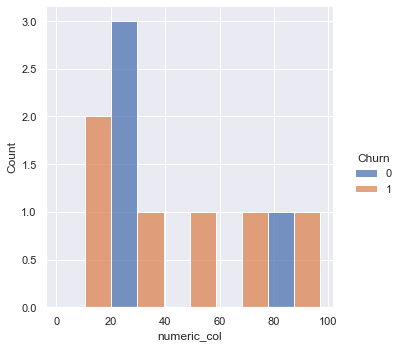

In [67]:

if __name__ == "__main__":
    logging.basicConfig(
    filename=PATH_LOGFILE,
    level = logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')
    
    ## generate test dataset
    df = pd.DataFrame({
        "cat_col": np.random.choice(["Dog", "Cat"], 10),
        "numeric_col": random.sample(range(1, 100), 10),
        "Churn": np.random.choice([0, 1], 10)
    })

    test_import(import_data)
    test_eda(perform_eda)
    test_visualize_cat(visualize_cat, df)
    test_visualize_numeric(visualize_numeric, df)
    test_visualize_numeric_bivar(visualize_numeric_bivar, df)
    test_eda(perform_eda)
    encoded_df = test_encoder_helper(encoder_helper, df)
    X_train, X_test, y_train, y_test = test_perform_feature_engineering(perform_feature_engineering, 
                                encoded_df)
    test_train_models(train_models)
    